In [35]:
import pandas as pd

# loading data

In [36]:
df_week_raw = pd.read_csv('../data_capestone/Predict injuries/week_approach_maskedID_timeseries.csv')

In [37]:
df_days_raw = pd.read_csv('../data_capestone/Predict injuries/day_approach_maskedID_timeseries.csv')

### all column names as excel file

In [38]:
weeks_headers = pd.DataFrame(df_week_raw.columns, columns=["column_names"])

weeks_headers.to_excel("../data_capestone/Predict injuries/week_header.xlsx", index=False)

In [39]:
days_headers = pd.DataFrame(df_days_raw.columns, columns=["column_names"])

days_headers.to_excel("../data_capestone/Predict injuries/days_header.xlsx", index=False)

In [40]:
# clean_weeks_headers = pd.DataFrame(df_weeks.columns, columns=["column_names"])

# clean_weeks_headers.to_excel("../data_capestone/Predict injuries/clean_week_header.xlsx", index=False)

In [41]:
# clean_days_headers = pd.DataFrame(df_days.columns, columns=["column_names"])

# clean_days_headers.to_excel("../data_capestone/Predict injuries/clean_days_header.xlsx", index=False)

# df_weeks

In [42]:
df_week_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

### check all columns

In [43]:
pd.set_option('display.max_columns', None)

df_week_raw.head(20)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,max km Z5-T1-T2 one day,total hours alternative training,nr. strength trainings,avg exertion,min exertion,max exertion,avg training success,min training success,max training success,avg recovery,min recovery,max recovery,nr. sessions.1,nr. rest days.1,total kms.1,max km one day.1,total km Z3-Z4-Z5-T1-T2.1,"nr. tough sessions (effort in Z5, T1 or T2).1",nr. days with interval session.1,total km Z3-4.1,max km Z3-4 one day.1,total km Z5-T1-T2.1,max km Z5-T1-T2 one day.1,total hours alternative training.1,nr. strength trainings.1,avg exertion.1,min exertion.1,max exertion.1,avg training success.1,min training success.1,max training success.1,avg recovery.1,min recovery.1,max recovery.1,nr. sessions.2,nr. rest days.2,total kms.2,max km one day.2,total km Z3-Z4-Z5-T1-T2.2,"nr. tough sessions (effort in Z5, T1 or T2).2",nr. days with interval session.2,total km Z3-4.2,max km Z3-4 one day.2,total km Z5-T1-T2.2,max km Z5-T1-T2 one day.2,total hours alternative training.2,nr. strength trainings.2,avg exertion.2,min exertion.2,max exertion.2,avg training success.2,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,0.6,2.08,2.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,30.9,13.8,13.5,0.0,2.0,12.4,6.4,0.0,0.0,2.08,2.0,0.1,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,3.0,4.0,16.1,9.9,3.9,0.0,1.0,3.2,3.2,0.0,0.0,0.00,1.0,0.09,0.08,0.10,0.0,0.0,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0.5,2.08,2.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,31.6,13.8,14.2,1.0,3.0,12.4,6.4,0.6,0.6,2.08,2.0,0.1,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,4.0,3.0,21.2,9.9,5.0,0.0,1.0,3.2,3.2,0.0,0.0,0.00,1.0,0.10,0.08,0.10,0.0,0.0,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0.5,2.08,2.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,31.6,13.8,14.2,1.0,3.0,12.4,6.4,0.6,0.6,2.08,2.0,0.1,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,3.0,4.0,21.2,9.9,5.0,0.0,1.0,3.2,3.2,0.0,0.0,0.00,0.0,0.10,0.10,0.10,0.0,0.0,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0.5,2.08,2.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,31.6,13.8,14.2,1.0,3.0,12.4,6.4,0.6,0.6,2.08,2.0,0.1,0.09,0.11,0.0,0.0,0.0,0.17,0.16,0.18,4.0,3.0,21.2,9.9,5.0,0.0,1.0,3.2,3.2,0.0,0.0,0.00,1.0,0.11,0.10,0.12,0.0,0.0,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,0.5,2.08,2.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,5.0,2.0,17.8,12.0,7.8,1.0,2.0,6.0,6.0,0.6,0.6,2.08,2.0,0.1,0.09,0.11,0.0,0.0,0.0,0.17,0.16,0.18,4.0,3.0,28.8,13.8,10.7,0.0,2.0,9.6,6.4,0.0,0.0,0.00,1.0,0.11,0.10,0.12,0.0,0.0,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
5,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,0.5,2.00,2.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.17,5.0,2.0,17.8,12.0,7.8,1.0,2.0,6.0,6.0,0.6,0.6,2.08,2.0,0.1,0.08,0.11,0.0,0.0,0.0,0.17,0.16,0.18,5.0,2.0,28.8,13.8,10.7,0.0,2.0,9.6,6.4,0.0,0.0,1.08,1.0,0.10,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,5
6,6.0,1.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,0.5,2.00,1.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,0.6,2.08,2.0,0.1,0.08,0.11,0.0,0.0,0.0,0.17,0.16,0.18,5.0,2.0,30.9,13.8,13.5,0.0,2.0,12.4,6.4,0.0,0.0,1.08,2.0,0.10,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,6
7,5.0,2.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,0.5,1.00,1.0,0.10,0.08,0.11,0.0,0.0,0.0,0.17,0.17,0.18,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,0.6,2.08,2.0,0.1,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,30.9,13.8,13.5,0.0,2.0,12.4

In [44]:
df_week_raw['nr. sessions'].unique()

array([ 5.,  6.,  7.,  4.,  3.,  2.,  8.,  9., 10.,  1.,  0., 11., 12.,
       13., 14.])

In [45]:
df_week_raw['nr. tough sessions (effort in Z5, T1 or T2)'].unique()

array([1., 0., 2., 3., 4., 5., 6.])

## check for nulls

In [46]:
df_week_raw.isnull().sum()

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

## check for duplicats

In [47]:
duplicates_w = df_week_raw[df_week_raw.duplicated()]

print('Number of duplicats: ', len(duplicates_w))

Number of duplicats:  0


# df_days

In [48]:
df_days_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

### check all columns

In [49]:
pd.set_option('display.max_columns', None)

df_days_raw.head(20)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,nr. sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,nr. sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,nr. sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,nr. sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.0,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.08,0.00,0.17,1.0,10.5,6.5,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.08,0.00,0.17,1.0,10.5,6.5,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.08,0.00,0.17,1.0,10.5,6.5,0.0,0.0

## check for nulls

In [50]:
df_days_raw.isnull().sum()

nr. sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
                              ..
perceived trainingSuccess.6    0
perceived recovery.6           0
Athlete ID                     0
injury                         0
Date                           0
Length: 73, dtype: int64

## check for duplicats

In [51]:
duplicates_d = df_days_raw[df_week_raw.duplicated()]

print('Number of duplicats: ', len(duplicates_d))

Number of duplicats:  0


# cleaning

In [52]:
list(df_week_raw.columns)

['nr. sessions',
 'nr. rest days',
 'total kms',
 'max km one day',
 'total km Z3-Z4-Z5-T1-T2',
 'nr. tough sessions (effort in Z5, T1 or T2)',
 'nr. days with interval session',
 'total km Z3-4',
 'max km Z3-4 one day',
 'total km Z5-T1-T2',
 'max km Z5-T1-T2 one day',
 'total hours alternative training',
 'nr. strength trainings',
 'avg exertion',
 'min exertion',
 'max exertion',
 'avg training success',
 'min training success',
 'max training success',
 'avg recovery',
 'min recovery',
 'max recovery',
 'nr. sessions.1',
 'nr. rest days.1',
 'total kms.1',
 'max km one day.1',
 'total km Z3-Z4-Z5-T1-T2.1',
 'nr. tough sessions (effort in Z5, T1 or T2).1',
 'nr. days with interval session.1',
 'total km Z3-4.1',
 'max km Z3-4 one day.1',
 'total km Z5-T1-T2.1',
 'max km Z5-T1-T2 one day.1',
 'total hours alternative training.1',
 'nr. strength trainings.1',
 'avg exertion.1',
 'min exertion.1',
 'max exertion.1',
 'avg training success.1',
 'min training success.1',
 'max training s

### rename columns - weeks

In [53]:
df_weeks = df_week_raw

# lowercase, space to '_', get rid of special characters, 
df_weeks.columns = df_weeks.columns.str.lower().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)

to prepare already for tableau, reduce the '_' as it may cause difficulties in reading

In [54]:
df_weeks = df_weeks.rename(columns={
 'nr_sessions': 'w1_Sessions',
 'nr_rest_days': 'w1_RestDays',
 'total_kms': 'w1_TotalKm',
 'max_km_one_day' : 'w1_MaxKmDay',
 'total_km_z3z4z5t1t2': 'w1_TotalKm_z3z4z5',
 'nr_tough_sessions_effort_in_z5_t1_or_t2': 'w1_ToughSessions_z5',
 'nr_days_with_interval_session' : 'w1_DaysIntervalSessions',
 'total_km_z34' : 'w1_TotalKm_z3z4',
 'max_km_z34_one_day' : 'w1_MaxKmDay_z3z4',
 'total_km_z5t1t2': 'w1_TotalKm_z5',
 'max_km_z5t1t2_one_day' : 'w1_MaxKmDay_z5',
 'total_hours_alternative_training' : 'w1_HoursAlternativeTraining',
 'nr_strength_trainings' : 'w1_StrengthTrainings',
 'avg_exertion' : 'w1_AvgExertion',
 'min_exertion' : 'w1_MinExertion',
 'max_exertion': 'w1_MaxExertion',
 'avg_training_success' : 'w1_AvgTrainingSuccess',
 'min_training_success' : 'w1_MinTrainingSuccess',
 'max_training_success' : 'w1_MaxTrainingSuccess',
 'avg_recovery' : 'w1_AvgPreRest',
 'min_recovery' : 'w1_MinPreRest',
 'max_recovery' : 'w1_MaxPreRest',
#
 'nr_sessions1' : 'w2_Sessions',
 'nr_rest_days1' : 'w2_RestDays',
 'total_kms1' : 'w2_TotalKm',
 'max_km_one_day1' : 'w2_MaxKmDay',
 'total_km_z3z4z5t1t21' : 'w2_TotalKm_z3z4z5',
 'nr_tough_sessions_effort_in_z5_t1_or_t21' : 'w2_ToughSessions_z5',
 'nr_days_with_interval_session1' : 'w2_DaysIntervalSessions',
 'total_km_z341' : 'w2_TotalKm_z3z4',
 'max_km_z34_one_day1' : 'w2_MaxKmDay_z3z4',
 'total_km_z5t1t21': 'w2_TotalKm_z5',
 'max_km_z5t1t2_one_day1': 'w2_MaxKmDay_z5',
 'total_hours_alternative_training1' : 'w2_HoursAlternativeTraining',
 'nr_strength_trainings1' : 'w2_StrengthTrainings',
 'avg_exertion1' : 'w2_AvgExertion',
 'min_exertion1' : 'w2_MinExertion',
 'max_exertion1': 'w2_MaxExertion',
 'avg_training_success1' : 'w2_AvgTrainingSuccess',
 'min_training_success1' : 'w2_MinTrainingSuccess',
 'max_training_success1' : 'w2_MaxTrainingSuccess',
 'avg_recovery1' : 'w2_AvgPreRest',
 'min_recovery1' : 'w2_MinPreRest',
 'max_recovery1' : 'w2_MaxPreRest',
#
 'nr_sessions2' : 'w3_Sessions',
 'nr_rest_days2' : 'w3_RestDays',
 'total_kms2' : 'w3_TotalKm',
 'max_km_one_day2' : 'w3_MaxKmDay',
 'total_km_z3z4z5t1t22' : 'w3_TotalKm_z3z4z5',
 'nr_tough_sessions_effort_in_z5_t1_or_t22' : 'w3_ToughSessions_z5',
 'nr_days_with_interval_session2' : 'w3_DaysIntervalSessions',
 'total_km_z342' : 'w3_TotalKm_z3z4',
 'max_km_z34_one_day2' : 'w3_MaxKmDay_z3z4',
 'total_km_z5t1t22' : 'w3_TotalKm_z5',
 'max_km_z5t1t2_one_day2': 'w3_MaxKmDay_z5',
 'total_hours_alternative_training2' : 'w3_HoursAlternativeTraining',
 'nr_strength_trainings2' : 'w3_StrengthTrainings',
 'avg_exertion2' : 'w3_AvgExertion',
 'min_exertion2' : 'w3_MinExertion',
 'max_exertion2': 'w3_MaxExertion',
 'avg_training_success2' : 'w3_AvgTrainingSuccess',
 'min_training_success2' : 'w3_MinTrainingSuccess',
 'max_training_success2' : 'w3_MaxTrainingSuccess',
 'avg_recovery2' : 'w3_AvgPreRest',
 'min_recovery2' : 'w3_MinPreRest',
 'max_recovery2' : 'w3_MaxPreRest',
#
 'athlete_id' : 'AthletesID',
 'injury' : 'Injury',
 'rel_total_kms_week_0_1' : 'w1_w2_VolumeChange',
 'rel_total_kms_week_0_2' : 'w1_w3_VolumeChange',
 'rel_total_kms_week_1_2' : 'w2_w3_VolumeChange',
 'date' : 'DayNumber'
}, inplace=False)

### datatypes - week

'total hours alternative training',


as there is no other column to combine with, 

### export df_weeks

In [65]:
df_weeks.to_csv('../data_capestone/Predict injuries/clean_weeks.csv',index=False, sep=",")

## rename columns - days

In [56]:
df_days = df_days_raw

# skipped first name-changing as lower case and space to '_' and renamed df_days.columns directly

to prepare already for tableau, reduce the '_' as it may cause difficulties in reading

In [57]:
df_days = df_days.rename(columns={
    'nr. sessions': 'd7_Sessions',
    'total km': 'd7_TotalKm',
    'km Z3-4': 'd7_KmZ3z4',
    'km Z5-T1-T2': 'd7_KmZ5',
    'km sprinting': 'd7_KmSprint',
    'strength training': 'd7_StrengthTraining',
    'hours alternative': 'd7_HoursAlternativeTraining',
    'perceived recovery': 'd7_PreRest',
    'perceived exertion': 'd7_Exertion',
    'perceived trainingSuccess': 'd7_TrainingSuccess',

    'nr. sessions.1': 'd6_Sessions',
    'total km.1': 'd6_TotalKm',
    'km Z3-4.1': 'd6_KmZ3z4',
    'km Z5-T1-T2.1': 'd6_KmZ5',
    'km sprinting.1': 'd6_KmSprint',
    'strength training.1': 'd6_StrengthTraining',
    'hours alternative.1': 'd6_HoursAlternativeTraining',
    'perceived exertion.1': 'd6_PreRest',
    'perceived trainingSuccess.1': 'd6_Exertion',
    'perceived recovery.1': 'd6_TrainingSuccess',

    'nr. sessions.2': 'd5_Sessions',
    'total km.2': 'd5_TotalKm',
    'km Z3-4.2': 'd5_KmZ3z4',
    'km Z5-T1-T2.2': 'd5_KmZ5',
    'km sprinting.2': 'd5_KmSprint',
    'strength training.2': 'd5_StrengthTraining',
    'hours alternative.2': 'd5_HoursAlternativeTraining',
    'perceived exertion.2': 'd5_PreRest',
    'perceived trainingSuccess.2': 'd5_Exertion',
    'perceived recovery.2': 'd5_TrainingSuccess',

    'nr. sessions.3': 'd4_Sessions',
    'total km.3': 'd4_TotalKm',
    'km Z3-4.3': 'd4_KmZ3z4',
    'km Z5-T1-T2.3': 'd4_KmZ5',
    'km sprinting.3': 'd4_KmSprint',
    'strength training.3': 'd4_StrengthTraining',
    'hours alternative.3': 'd4_HoursAlternativeTraining',
    'perceived exertion.3': 'd4_PreRest',
    'perceived trainingSuccess.3': 'd4_Exertion',
    'perceived recovery.3': 'd4_TrainingSuccess',

    'nr. sessions.4': 'd3_Sessions',
    'total km.4': 'd3_TotalKm',
    'km Z3-4.4': 'd3_KmZ3z4',
    'km Z5-T1-T2.4': 'd3_KmZ5',
    'km sprinting.4': 'd3_KmSprint',
    'strength training.4': 'd3_StrengthTraining',
    'hours alternative.4': 'd3_HoursAlternativeTraining',
    'perceived exertion.4': 'd3_PreRest',
    'perceived trainingSuccess.4': 'd3_Exertion',
    'perceived recovery.4': 'd3_TrainingSuccess',

    'nr. sessions.5': 'd2_Sessions',
    'total km.5': 'd2_TotalKm',
    'km Z3-4.5': 'd2_KmZ3z4',
    'km Z5-T1-T2.5': 'd2_KmZ5',
    'km sprinting.5': 'd2_KmSprint',
    'strength training.5': 'd2_StrengthTraining',
    'hours alternative.5': 'd2_HoursAlternativeTraining',
    'perceived exertion.5': 'd2_PreRest',
    'perceived trainingSuccess.5': 'd2_Exertion',
    'perceived recovery.5': 'd2_TrainingSuccess',

    'nr. sessions.6': 'd1_Sessions',
    'total km.6': 'd1_TotalKm',
    'km Z3-4.6': 'd1_KmZ3z4',
    'km Z5-T1-T2.6': 'd1_KmZ5',
    'km sprinting.6': 'd1_KmSprint',
    'strength training.6': 'd1_StrengthTraining',
    'hours alternative.6': 'd1_HoursAlternativeTraining',
    'perceived exertion.6': 'd1_PreRest',
    'perceived trainingSuccess.6': 'd1_Exertion',
    'perceived recovery.6': 'd1_TrainingSuccess',

    'Athlete ID': 'AthletesID',
    'injury': 'Injury',
    'Date': 'DayNumber'
}, inplace=False) 


In [58]:
df_days.head(1)

,d7_Sessions,d7_TotalKm,d7_KmZ3z4,d7_KmZ5,d7_KmSprint,d7_StrengthTraining,d7_HoursAlternativeTraining,d7_Exertion,d7_TrainingSuccess,d7_PreRest,d6_Sessions,d6_TotalKm,d6_KmZ3z4,d6_KmZ5,d6_KmSprint,d6_StrengthTraining,d6_HoursAlternativeTraining,d6_PreRest,d6_Exertion,d6_TrainingSuccess,d5_Sessions,d5_TotalKm,d5_KmZ3z4,d5_KmZ5,d5_KmSprint,d5_StrengthTraining,d5_HoursAlternativeTraining,d5_PreRest,d5_Exertion,d5_TrainingSuccess,d4_Sessions,d4_TotalKm,d4_KmZ3z4,d4_KmZ5,d4_KmSprint,d4_StrengthTraining,d4_HoursAlternativeTraining,d4_PreRest,d4_Exertion,d4_TrainingSuccess,d3_Sessions,d3_TotalKm,d3_KmZ3z4,d3_KmZ5,d3_KmSprint,d3_StrengthTraining,d3_HoursAlternativeTraining,d3_PreRest,d3_Exertion,d3_TrainingSuccess,d2_Sessions,d2_TotalKm,d2_KmZ3z4,d2_KmZ5,d2_KmSprint,d2_StrengthTraining,d2_HoursAlternativeTraining,d2_PreRest,d2_Exertion,d2_TrainingSuccess,d1_Sessions,d1_TotalKm,d1_KmZ3z4,d1_KmZ5,d1_KmSprint,d1_StrengthTraining,d1_HoursAlternativeTraining,d1_PreRest,d1_Exertion,d1_TrainingSuccess,AthletesID,Injury,DayNumber
0,1.0,5.8,0.0,0.6,1.2,0.0,0.0,0.11,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.0,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.0,0.11,0.0,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.15,0,0,0


# first analysis

In [59]:
# import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")

## wich columns could be looked at for a correlation with injuries?

### one week before event

In [61]:
selected_columns = [
 'w1_Sessions',
 'w1_RestDays',
 'w1_TotalKm',
 #'w1_MaxKmDay',
 #'w1_TotalKm_z3z4z5',
 'w1_ToughSessions_z5',
 #'w1_DaysIntervalSessions',
 #'w1_TotalKm_z3z4',
 #'w1_MaxKmDay_z3z4',
 'w1_TotalKm_z5',
 #'w1_MaxKmDay_z5',
 'w1_HoursAlternativeTraining',
 'w1_StrengthTrainings',
 #'w1_AvgExertion',
 #'w1_MinExertion',
 #'w1_MaxExertion',
 #'w1_AvgTrainingSuccess',
 #'w1_MinTrainingSuccess',
 #'w1_MaxTrainingSuccess',
 #'w1_AvgPreRest',
 #'w1_MinPreRest',
 #'w1_MaxPreRest',
 'Injury',
 'w1_w2_VolumeChange',
 'w1_w3_VolumeChange',
 'w2_w3_VolumeChange',
 #'DayNumber'
 ]

df_week_before = df_weeks[selected_columns]

In [63]:
df_sample = df_week_before.sample(n=10, random_state=42)
df_sample.info()
df_sample_reset = df_sample.reset_index(drop=True)

df_sample_reset.to_csv('../data_capestone/Predict injuries/week_sample.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 13658 to 16248
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   w1_Sessions                  10 non-null     float64
 1   w1_RestDays                  10 non-null     float64
 2   w1_TotalKm                   10 non-null     float64
 3   w1_ToughSessions_z5          10 non-null     float64
 4   w1_TotalKm_z5                10 non-null     float64
 5   w1_HoursAlternativeTraining  10 non-null     float64
 6   w1_StrengthTrainings         10 non-null     float64
 7   Injury                       10 non-null     int64  
 8   w1_w2_VolumeChange           10 non-null     float64
 9   w1_w3_VolumeChange           10 non-null     float64
 10  w2_w3_VolumeChange           10 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 960.0 bytes


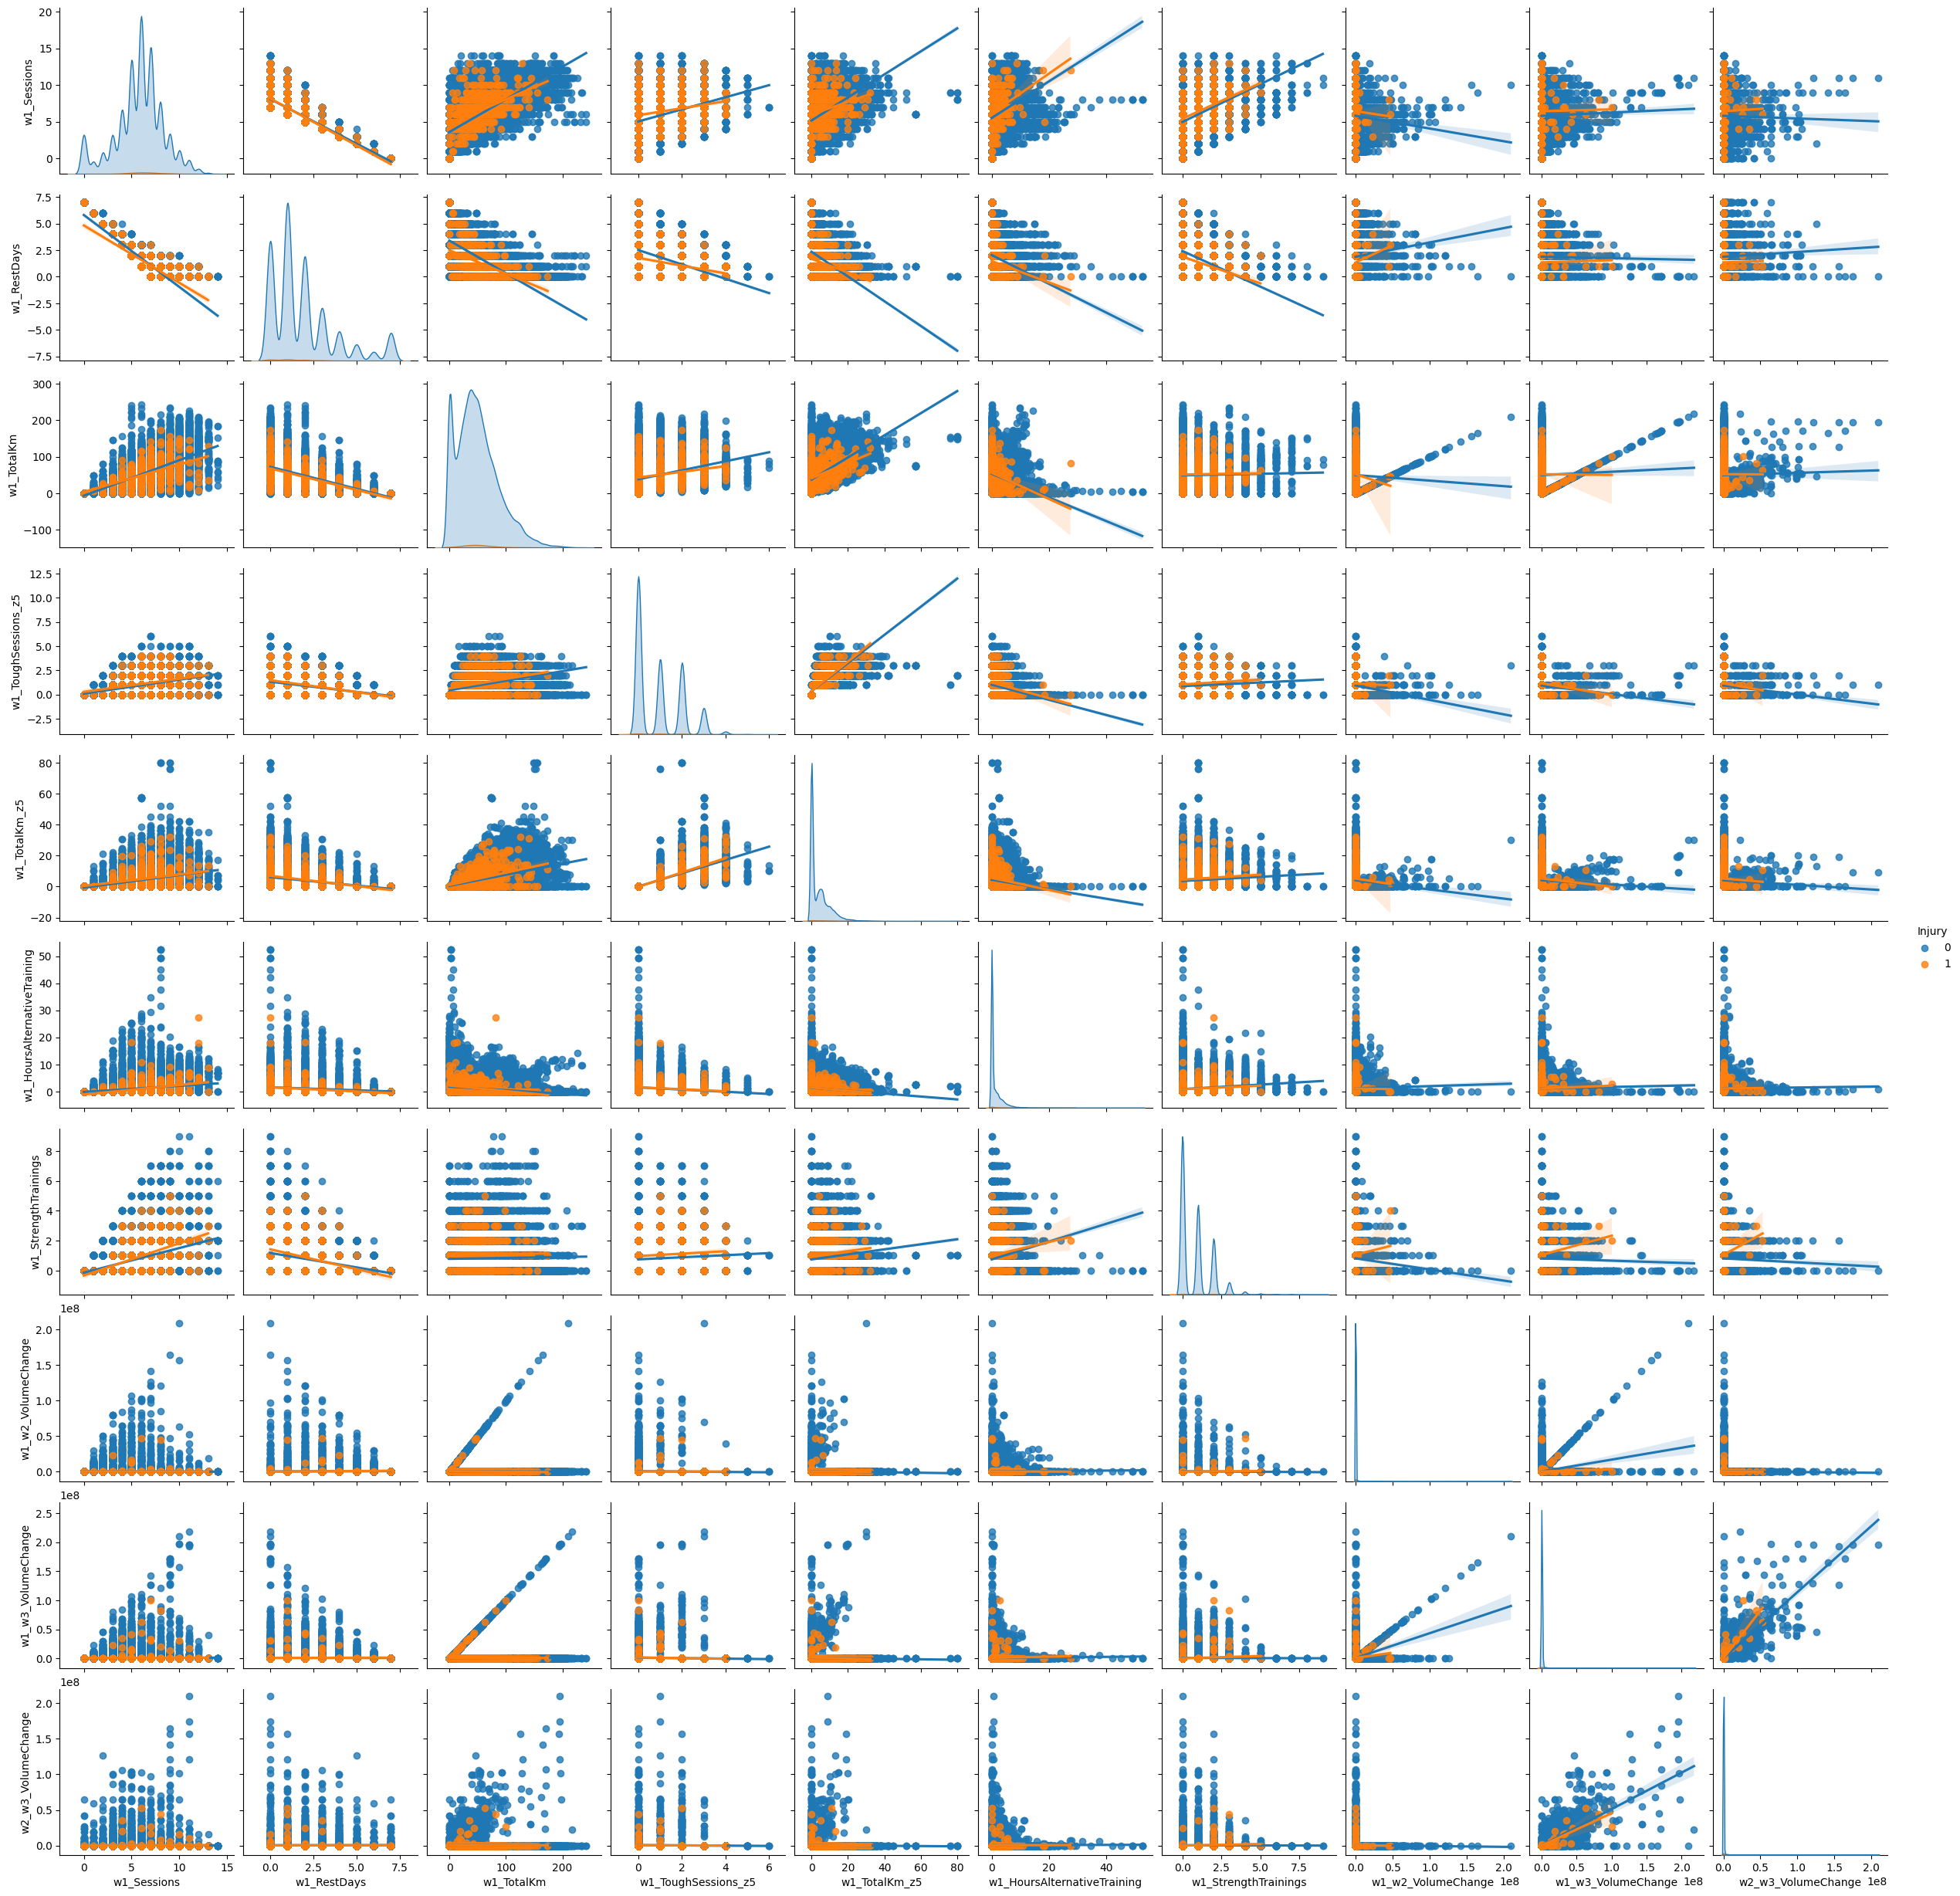

In [64]:
sns.pairplot(df_week_before, kind='reg', diag_kind='kde', hue='Injury')
plt.show()


## potential combination (Hypothesis) to look for regression 

### perspective: over the three weeks
1. Number of tough sessions(factual) over the three weeks: (depending on nr. of rest days?)
    'nr. tough sessions (effort in Z5, T1 or T2)'
    'nr. tough sessions (effort in Z5, T1 or T2).1'
    'nr. tough sessions (effort in Z5, T1 or T2).2'
    'injury'==1 vs 'injury'==0

2.  max exertion (subjective) over the three weeks
    'max exertion'
    'max exertion.1'
    'max exertion.2' 
    'injury'==1 vs 'injury'==0

### training shape - volume as an injury risk
3.  Volume increase
    'rel total kms week 0_1',
    'rel total kms week 0_2',
    'rel total kms week 1_2',
    'injury'==1 vs 'injury'==0

### real effort vs felt exertion
4. Rest days and nr. of tough sessions : H2: the less rest days the more tough sessions
5. max km in Z3-Z4 one day & nr. tough sessions
